In [3]:
# prompt: upload and read BUSHING DIAMETER 2 BATCHES.XLS from my google drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'path/to/your/file.xls' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/BUSHING DIAMETER 2 BATCHES.XLS'

# Read the Excel file
df = pd.read_excel(file_path)

# Now you can work with the DataFrame 'df'
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Batch 1  Batch 2
0    1.001    1.000
1    1.005    1.005
2    1.015    1.015
3    1.020    1.005
4    1.010    0.990


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


1)

In [7]:
stats_batch_1 = df['Batch 1'].describe()
stats_batch_2 = df['Batch 2'].describe()

print("Descriptive Statistics for Batch 1:")
print(stats_batch_1)

print("\nDescriptive Statistics for Batch 2:")
print(stats_batch_2)

Descriptive Statistics for Batch 1:
count    50.000000
mean      1.003360
std       0.007714
min       0.985000
25%       0.999000
50%       1.001000
75%       1.009000
max       1.025000
Name: Batch 1, dtype: float64

Descriptive Statistics for Batch 2:
count    50.000000
mean      1.003660
std       0.007227
min       0.990000
25%       1.000000
50%       1.005000
75%       1.006750
max       1.019000
Name: Batch 2, dtype: float64


In [9]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin_of_error, mean + margin_of_error

ci_batch_1 = confidence_interval(df['Batch 1'])
ci_batch_2 = confidence_interval(df['Batch 2'])

print(f"\n95% Confidence Interval for Batch 1: {ci_batch_1}")
print(f"95% Confidence Interval for Batch 2: {ci_batch_2}")


95% Confidence Interval for Batch 1: (1.0011678045341814, 1.0055521900108013)
95% Confidence Interval for Batch 2: (1.001606124657733, 1.00571388362016)


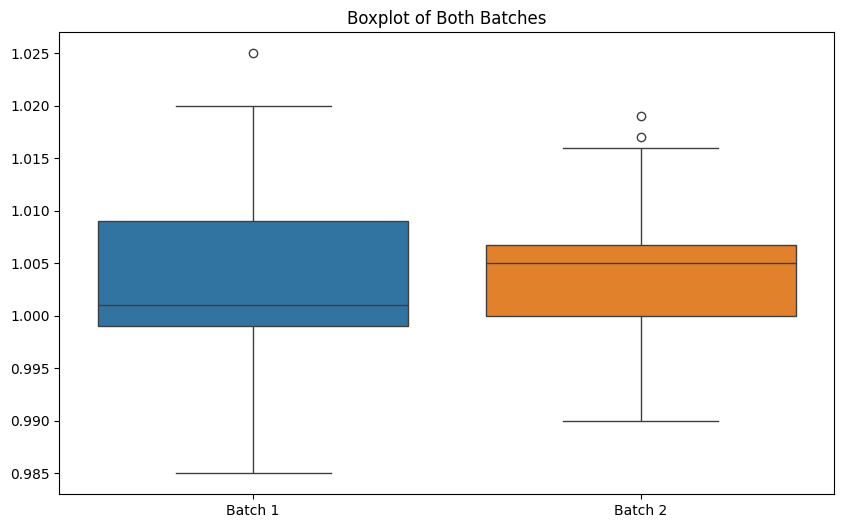

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Both Batches')
plt.show()

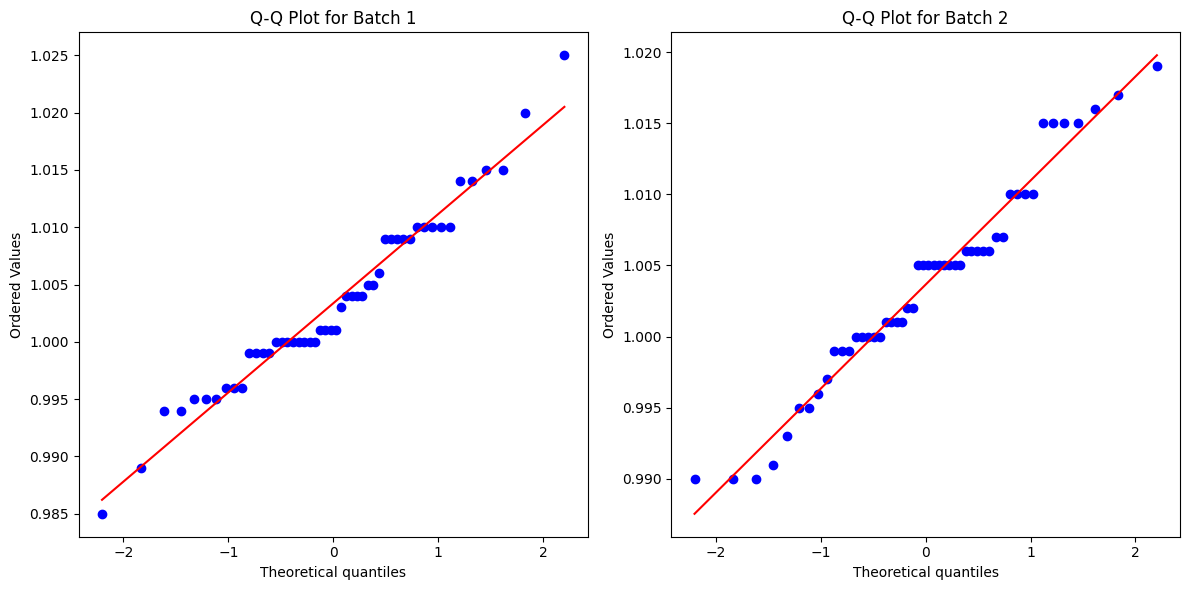

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['Batch 1'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Batch 1')

plt.subplot(1, 2, 2)
stats.probplot(df['Batch 2'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Batch 2')

plt.tight_layout()
plt.show()

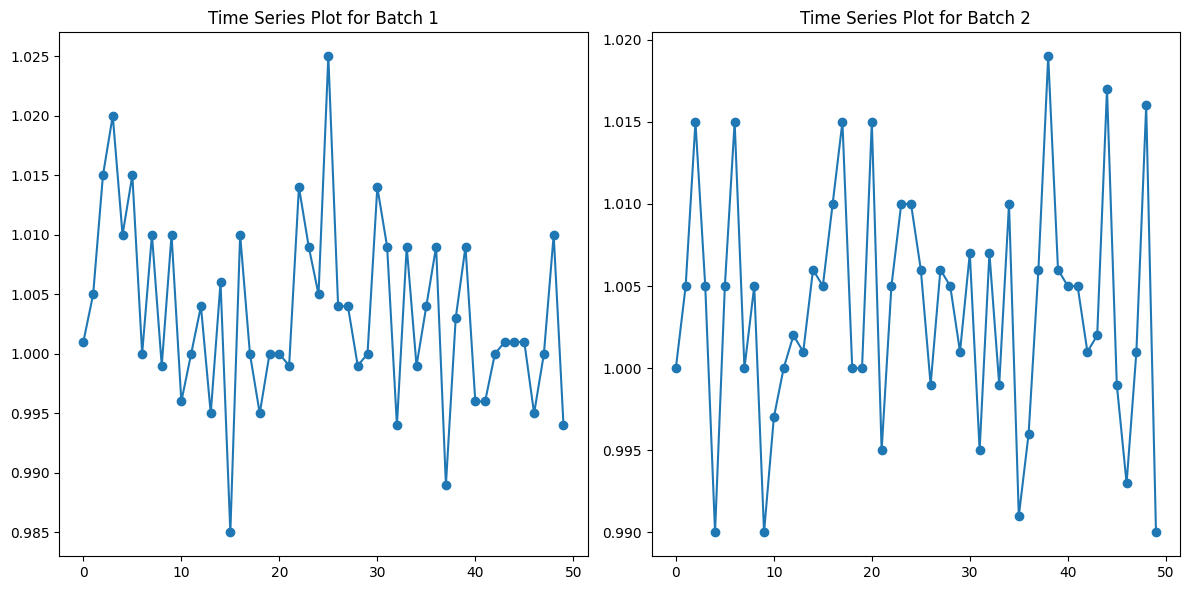

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df['Batch 1'].values, marker='o')
plt.title('Time Series Plot for Batch 1')

plt.subplot(1, 2, 2)
plt.plot(df['Batch 2'].values, marker='o')
plt.title('Time Series Plot for Batch 2')

plt.tight_layout()
plt.show()

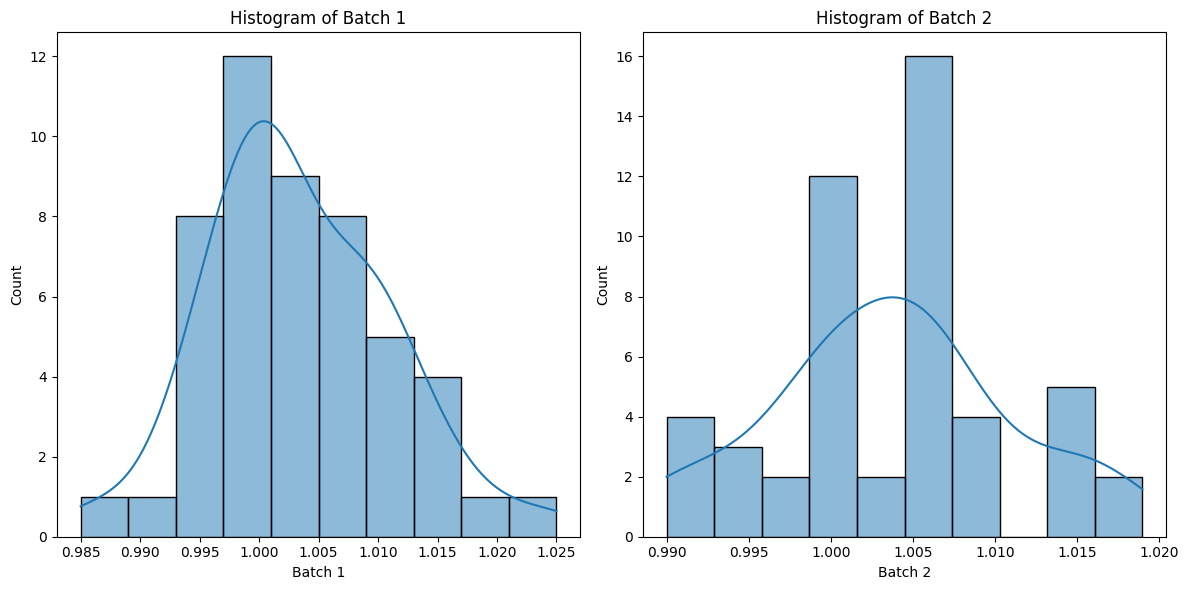

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Batch 1'], kde=True, bins=10)
plt.title('Histogram of Batch 1')

plt.subplot(1, 2, 2)
sns.histplot(df['Batch 2'], kde=True, bins=10)
plt.title('Histogram of Batch 2')

plt.tight_layout()
plt.show()

2)

In [18]:
_, p_value_batch_1 = stats.shapiro(df['Batch 1'])
_, p_value_batch_2 = stats.shapiro(df['Batch 2'])

print(f"Shapiro-Wilk Test p-value for Batch 1: {p_value_batch_1}")
print(f"Shapiro-Wilk Test p-value for Batch 2: {p_value_batch_2}")

Shapiro-Wilk Test p-value for Batch 1: 0.24679169928341926
Shapiro-Wilk Test p-value for Batch 2: 0.14687273785424232


Normally Distributed

Levene's Test statistic: 0.1738243824226096
Levene's Test p-value for variances: 0.6776469303399624
Variances are equal (fail to reject the null hypothesis).


H0:μx=μy
H1:μx=/μy
x= batch 1
y= batch 2


In [25]:

t_stat, p_value_ttest = stats.ttest_ind(df['Batch 1'], df['Batch 2'])

print(f"T-Test Statistic: {t_stat}")
print(f"T-Test p-value: {p_value_ttest}")

alpha = 0.05

if p_value_ttest < alpha:
  print("Reject the null hypothesis. There is a significant difference between the means of Batch 1 and Batch 2.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference between the means of Batch 1 and Batch 2.")


T-Test Statistic: -0.20069326371886348
T-Test p-value: 0.8413543498820846
Fail to reject the null hypothesis. There is no significant difference between the means of Batch 1 and Batch 2.


3)

In [27]:
from scipy import stats

df = 24

test_statistics = [-2.80, -1.75, -2.54, -2.05]

p_values = [stats.t.cdf(t0, df) for t0 in test_statistics]

for t0, p_value in zip(test_statistics, p_values):
    print(f"Test statistic t0 = {t0} has a P-value of approximately {p_value:.4f}")

Test statistic t0 = -2.8 has a P-value of approximately 0.0050
Test statistic t0 = -1.75 has a P-value of approximately 0.0464
Test statistic t0 = -2.54 has a P-value of approximately 0.0090
Test statistic t0 = -2.05 has a P-value of approximately 0.0257


4)

Test Statistic: -3.0906
P-Value: 0.0129
Reject the null hypothesis: The mean thickness is significantly different from 13.4.
99% Confidence Interval: (13.3922, 13.4002)
Shapiro-Wilk Test Statistic: 0.9470
Shapiro-Wilk P-Value: 0.6331


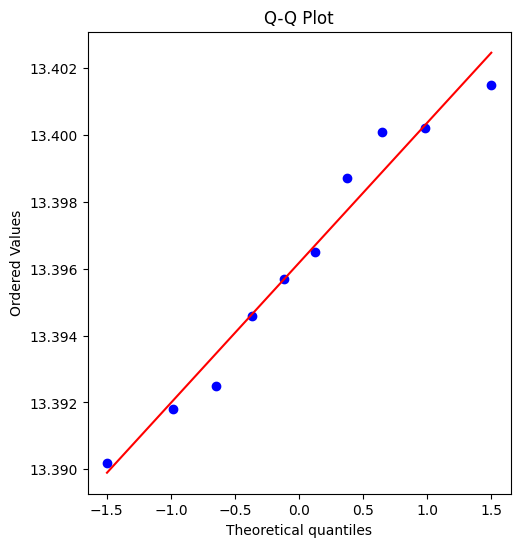

In [31]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


data = np.array([13.3987, 13.3957, 13.3902, 13.4015, 13.4001,
                 13.3918, 13.3965, 13.3925, 13.3946, 13.4002])


mu_0 = 13.40
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)


t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-1))

print(f"Test Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean thickness is significantly different from 13.4.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 13.4.")


confidence_level = 0.99
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
margin_of_error = t_critical * (sample_std / np.sqrt(n))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"99% Confidence Interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')

shapiro_test = stats.shapiro(data)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}")
print(f"Shapiro-Wilk P-Value: {shapiro_test.pvalue:.4f}")

plt.show()
